In [222]:
import pandas as pd

In [223]:
messages = pd.read_csv('SMSSpamCollection', sep="	", header=None)


In [224]:
messages

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [225]:
from sklearn.model_selection import train_test_split

y = messages[0].map({'spam' : 1, 'ham': 0})
X = messages.drop(columns= 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((3900, 1), (1672, 1))

In [226]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3377
1     523
Name: 0, dtype: int64
0    1448
1     224
Name: 0, dtype: int64


In [227]:
# Baseline accuracy
print('ACC', 1448/(1448 + 224))

ACC 0.8660287081339713


### Text cleaning

In [228]:
text = messages[1] #select text
text = text.str.lower() #change to lowercase
text

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: 1, Length: 5572, dtype: object

In [229]:
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

text = text.apply(remove_punctuation)
text #remove punctuations

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object

Dont remove numbers since it can be a sign of spam or ham

Tokenize

In [230]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_tokenized = text.apply(word_tokenize)
text_tokenized.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhangursingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: 1, dtype: object

In [231]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words

text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhangursingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, £750, pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: 1, Length: 5572, dtype: object

### Document-Term Matrix

In [232]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_no_stop.apply(TreebankWordDetokenizer().detokenize)
text_detokenized


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: 1, Length: 5572, dtype: object

In [233]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<5572x9453 sparse matrix of type '<class 'numpy.int64'>'
	with 47418 stored elements in Compressed Sparse Row format>

In [234]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=messages.index)
dtm

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 20])

call     577
im       464
ur       390
get      383
dont     287
        ... 
sae       21
lose      21
tot       21
bonus     21
trip      21
Length: 450, dtype: int64


In [236]:
# 0.5% of the messages or more ???(appears in 6 or more):

countvec2 = CountVectorizer(min_df=0.005)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=messages.index)
dtm2.sum().sort_values(ascending=False) 

call      577
im        464
ur        390
get       383
dont      287
         ... 
todays     28
thank      28
tv         28
dad        28
asked      28
Length: 316, dtype: int64

In [237]:
# Now, let's try with 1% of the tweets or more (appears in 12 or more):

countvec3 = CountVectorizer(min_df=0.01)
sparse_dtm3 = countvec3.fit_transform(text_detokenized)

dtm3 = pd.DataFrame(sparse_dtm3.toarray(), columns=countvec3.get_feature_names(), index=messages.index)
dtm3.sum().sort_values(ascending=False)

call        577
im          464
ur          390
get         383
dont        287
           ... 
customer     58
gonna        58
per          58
always       57
nice         57
Length: 124, dtype: int64

## Model

In [250]:
from sklearn.model_selection import train_test_split

y = messages[0].map({'spam' : 1, 'ham': 0})
X = dtm2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((3900, 316), (1672, 316))

In [251]:
dtm

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
y_train

2169    0
3203    0
2279    0
2285    0
2180    0
       ..
4083    0
1354    0
1822    0
5494    0
5363    0
Name: 0, Length: 3900, dtype: int64

In [253]:
X_train

,100,1000,150,150ppm,16,18,1st,2000,2nd,500,...,would,xxx,ya,yeah,year,yes,yet,yo,youre,yup
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1822,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)


LogisticRegression(random_state=88)

In [255]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .4 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1431   17]
 [  43  181]]

Accuracy: 0.9641148325358851


In [256]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

#y_pred = logreg.predict(X_test)
print("OSR2: %s" % OS_R_squared(y_pred,y_test,y_train))

OSR2: 0.6907064389925154


In [245]:
# y_prob = logreg.predict_proba(X_train) #training
# y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_train.index)

# cm = confusion_matrix(y_train, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_train, y_pred))

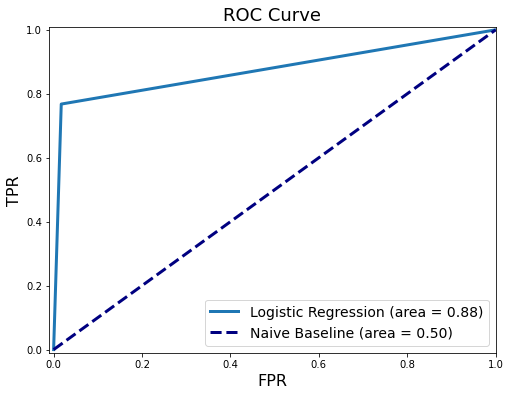

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [247]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))

In [248]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.869
